This Jupyter notebook is a property of the University of California and copyrighted by Dipak Ghosal. Only personal use for ECS 132 class is allowed. Uploading this to any shared site is a violation of the University of California copyright laws

# A Project on Covert Timing Channels

## Instructions

    1. You may in no circumstances upload this project to private tutoring websites such as CourseHero or Chegg. Remember all material related to this course  is a property of the University of California and posting them is a violation of the copyright laws and will lead to serious consequences. 
    
    2. In doing this project if you refer to a source (either a book or the internet), you must cite it.
    
    3. You are highly urged to work on this project on your own.  If you do discuss with others,  you must list their names. 
    
    4. This Jupyter Notebook requires Python 3 ipykernel. You  must write your code in Python 3. Make sure to run this notebook under the Python kernel.

## 1. Introduction
The goal of this project is to learn about how to design, detect, and implement a covert timing channel using a stream of packets generated by an application.  We will do this project in steps. At this point we will get started with the first simple step. 

## 2. Background

Covert communication is method of exchanging secret messages in which the communication is hidden. A related term is steganography which  deals with methods  to write/embed hidden messages in such a way that no one, other than the sender and the intended receiver, know the existence of the message. The word steganography is of Greek origin and means "concealed writing" from the Greek words steganos meaning "covered or protected", and graphei meaning "writing" [From Wikipedia]. Steganography and covert channels have a long history and was used  in WWII to send secret messages to spies behind enemy lines. In the computer and network security, covert channels and steganography  fall in the broad category of security through obscurity.

The advantage of a covert channel over cryptography is that messages do not attract attention to themselves. Plainly visible encrypted messages — no matter how unbreakable — will arouse suspicion. The very presence of encrypted messages may be incriminating in countries where encryption is illegal. In such cases the communication channel must itself be hidden and this is achieved using covert channels / steganography. Note that, cryptography protects the contents of a message. Covert communication on the other hand protects both the message and the communicating parties.

Typically, steganography refers to the concealment of information within a document file, image file, or program. Media files are ideal for steganographic transmission because of their large size. As a simple example, a sender might start with an innocuous image file and adjust the color of every 100th pixel to correspond to a letter in the alphabet. The overall change is so small  that someone not specifically looking for it is unlikely to notice it. Another method is called the Least Significant Bit (LSB) substitution. In this method, the least significant bit of each  pixel in a digital image is modified by the bits  of the secret message. Since the LSB contributes very little to the overall (intensity/color/brightness) of each pixel, the change in the image will be imperceptible to the naked eye.

Covert channels are communication channels that are established over some overt medium. For example, we can uses a stream of network packets (for example stream of packets generated by a Skype call) as the overt carrier for a covert communication channel. As usual, we have our three characters Alice, Bob, and Eve. Alice and Bob are in a repressive country where all communication is monitored and they want to establish a covert channel to exchange secret messages. Eve is a warden who can look at all network packets and try to detect if any covert communication is being used to plan a uprising against the repressive state.

To setup a covert communication channel, Alice and Bob first initiate an overt application let say a (computer to computer) Skype call and they start a regular innocuous conversation. Their interactive conversation produces a stream of IP packets from Alice to Bob and Bob to Alice.  For the time being let us only consider covert channel in one direction from Alice to Bob and hence only consider the IP packets stream from Alice to Bob. There are two ways in which Alice can send a secret message. She can replace some unused bits in the protocol header with the bits of the covert message. This is called a **covert storage channel**. These types of channels are easily detectable since the protocol header fields that are not used are well known to Eve and she can check bits to detect the covert channel, identify Alice and Bob and the covert message. The other method that Alice can uses is to alter the inter-packet delays of the IP packet using a pre-established shared key to modulate the bits of the secret message. This is called a **covert timing channel** and will be the focus of our study.  



## 3. A Concrete Example

To make things more concrete lets consider a concrete example. For simplicity, we will assume that Alice has buffered a large number of the IP packets that she has generated (as a result of her talking). This is obviously not realistic [why?] but for this first step let's make this assumption. Each packet has two attributes 1) a sequence number and 2) the time when the packet was generated. Thus, P(n, tn) denotes packet n which was generated at time tn. We will assume that the first packet is numbered 1 and is generated at  time 0, i.e.,  t1 = 0. Note that the time field gives the cumulative time. To obtain the inter-packet delay, we can take the time difference between the consecutive packets.  This packet stream is the unmodified overt traffic.
Alice and Bob have a priori decided that an inter-packet delay of 0.5 will  be used to code 1 and an inter-packet delay of 0.1 will be used to code a 0. So if Alice wants to send the alphabet “b” (which isd 0110 0010) she will generate the following sequence of packets P(1, T0), P(2, T1=T0+0.1), P(3, T2=T1+0.5), P(3, T3 = T2+0.1), P(4, T4 = T3+0.1) for the first 4 bits starting from the LSB.  This  is shown in the Figure below. 

<figure> 
    <img src="Figures/Timing-Channel-Example.jpg" width="800" height="600">
    <figcaption align = "center"><b>Figure - A very simplistic timing channel </b></figcaption>
</figure>


If the timing between the packets are not altered by the network or by Eve, then Bob can observe  the inter-packet delays, translate them to binary  bits and then determine the corresponding character.  In this assignment, we will try to design a method of modulating the bits into inter-packet delays such that Eve is not able to discover the channel. We will assume that the network or Eve will not modify the inter-packet delays.

## 4.  A First Simple Design

Alice ad Bob are having a Skype call. When Alice talks, the Skype application generates packets. This is called the **overt packet stream**. In her computer Alice has created a packet buffer (in memory)  which holds a bunch of packets (as many as required to send the secret message) and then a using aspecially designed packet scheduler releases the packet with interpacket delays that encode the secret message.  The overall system in Alice's computer is shown in the Figure below.  In this part of the project we  will consider a few simple scheme for encoding a secret message in the inter-packet delays. 

<figure> 
    <img src="Figures/Timing-Channel-Alice.jpg" width="800" height="600">
    <figcaption align = "center"><b>Figure showing the setup in Alice's computer. The overt stream of packets is generated by the Skype application. The inter-packet delays has some (given)  random distribution. The covert packet stream is generated by the packet scheduler. The inter-packet delays are chosen suh that they encode the secret message.  </b></figcaption>
</figure>



### 4.1 The secret message that Alice wants to send to Bob  is ``this is a secret message''  The characters are encoded using 8 bits ASCII. Write a code to convert  the secret message into a sequence of bits. Include the spaces as well. You can use the bin and ord  functions.  

In [1]:
asdf = str(bin(ord("t")).replace("b",""))
asdf += str(bin(ord("h")).replace("b",""))
asdf += str(bin(ord("i")).replace("b",""))
asdf += str(bin(ord("s")).replace("b",""))
asdf += str(bin(ord(" ")).replace("b","0"))
asdf += str(bin(ord("i")).replace("b",""))
asdf += str(bin(ord("s")).replace("b",""))
asdf += str(bin(ord(" ")).replace("b","0"))
asdf += str(bin(ord("a")).replace("b",""))
asdf += str(bin(ord(" ")).replace("b","0"))
asdf += str(bin(ord("s")).replace("b",""))
asdf += str(bin(ord("e")).replace("b",""))
asdf += str(bin(ord("c")).replace("b",""))
asdf += str(bin(ord("r")).replace("b",""))
asdf += str(bin(ord("e")).replace("b",""))
asdf += str(bin(ord("t")).replace("b",""))
asdf += str(bin(ord(" ")).replace("b","0"))
asdf += str(bin(ord("m")).replace("b",""))
asdf += str(bin(ord("e")).replace("b",""))
asdf += str(bin(ord("s")).replace("b",""))
asdf += str(bin(ord("s")).replace("b",""))
asdf += str(bin(ord("a")).replace("b",""))
asdf += str(bin(ord("g")).replace("b",""))
asdf += str(bin(ord("e")).replace("b",""))
print(asdf);



011101000110100001101001011100110010000001101001011100110010000001100001001000000111001101100101011000110111001001100101011101000010000001101101011001010111001101110011011000010110011101100101


In [18]:
011101000110100001101001011100110010000001101001011100110010000001100001001000000111001101100101011000110111001001100101011101000010000001101101011001010111001101110011011000010110011101100101

'01110100'

### 4.2 Alice has buffered a sequence of packets that was generated by Skype. This is given in a excel file.  This called the overt packet stream. Write a Python code to plot the histogram of the inter-packet delays of the overt packet stream. 

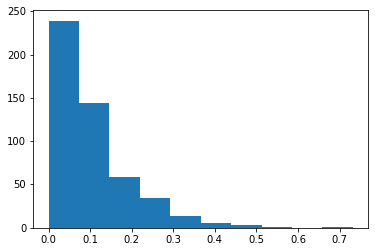

In [3]:
import csv
import matplotlib.pyplot as plt

inputfile = csv.reader(open("Traffic_data_orig.csv"))

time = []
delay = []

for row in inputfile:
  if row[1] == "Time":
    continue
  time.append(float(row[1]))

for i in range(0,500):
  delay.append(time[i + 1] - time[i])
  
plt.hist(delay)
plt.show()


### 4.3 Alice and Bob decide to use the following modulation scheme to map the bits to the inter-packet delay. A delay of 0.25 is used to encode a bit 0 and delay of 0.75 is used to encode a bit 1. Write a Python code  that will generate the modified packet stream that contains the secret message. Note  that you will not need all the packets that you are given. 

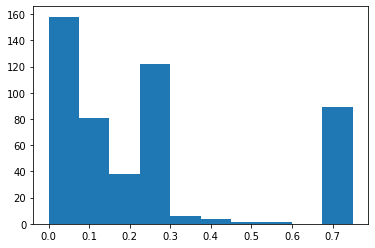

In [4]:
import csv
import matplotlib.pyplot as plt

inputfile = csv.reader(open("Traffic_data_orig.csv"))

time = []
delay = []
bitArray = []
bitString = "011101000110100001101001011100110010000001101001011100110010000001100001001000000111001101100101011000110111001001100101011101000010000001101101011001010111001101110011011000010110011101100101"

for row in inputfile:
  if row[1] == "Time":
    continue
  time.append(float(row[1]))

for i in range(0,500):
  delay.append(time[i + 1] - time[i])
  
for element in bitString:
  bitArray.append(int(element))

for i in range(0, 192):
  if bitArray[i] == 0:
    delay[i] = .25
  elif bitArray[i] == 1:
    delay[i] = .75

plt.hist(delay)
plt.show()


### 4.4 Plot the histogram of the covert packet stream. Will Eve be suspicious?

In [ ]:
Comparing the histogram of the covert packet stream to the original packet stream, it is clear that there is a large concentration of values around .25 and .75, whereas the original packet streams data was really centralized in the lesser values. Therefore, I would say that Eve would be suspicious when she notices the large concentration of values at .75 especially.

### 4.5  Alice and Bob decide to use the following modulation scheme. Let $m$, $\min$, and $\max$ denote the median, min, and max of the inter-packet delay of the overt packet stream. If Alice needs to send a 0 she randomly generates a delay between $m$ and $\min$. If she want to send a 1 she randomly generates a delay between $m$ and $\max$. First, compute $m$, $\min$, and $\max$ of the overt packet stream. Next, modify the code  in  4.3, to generate  the covert  packet stream that contains  the secret message.

In [5]:
import csv
import matplotlib.pyplot as plt
import random

inputfile = csv.reader(open("Traffic_data_orig.csv"))

time = []
delay = []
bitArray = []
bitString = "011101000110100001101001011100110010000001101001011100110010000001100001001000000111001101100101011000110111001001100101011101000010000001101101011001010111001101110011011000010110011101100101"

for row in inputfile:
  if row[1] == "Time":
    continue
  time.append(float(row[1]))

for i in range(0,500):
  delay.append(time[i + 1] - time[i])
  
#median
m = sum(delay) / len(delay)
print(m)
#maximum
max = max(delay)
print(max)
#minimum
min = min(delay)
print(min)
for element in bitString:
  bitArray.append(int(element))

for i in range(0, 192):
  if bitArray[i] == 0:
    delay[i] = random.uniform(min,m)
  elif bitArray[i] == 1:
    delay[i] = random.uniform(m, max)
    
print(delay)

#plt.hist(delay)
#plt.show()


0.10112731999999999
0.7319900000000032
9.999999996068709e-06
[0.0790642094899533, 0.5793242672909982, 0.1154330823162978, 0.6431643922800384, 0.06423051436705245, 0.5104570960771843, 0.05008181676788294, 0.07036884337161502, 0.020511957133514176, 0.2308618622857038, 0.15306513529860735, 0.009757645033024688, 0.1507853559171421, 0.057501190365893996, 0.0010061141223501049, 0.051603789762031754, 0.08606491203443288, 0.7075129253221656, 0.5940428648951412, 0.0038513039884158777, 0.42125683336085373, 0.04025478048594668, 0.04022494519226878, 0.5032895417220985, 0.0051535174236060225, 0.23681346799033384, 0.6146091161048072, 0.11355252361836182, 0.030054347540404314, 0.0685684747858037, 0.5896472536599064, 0.20782580261857075, 0.08791860282723905, 0.09173113867812983, 0.7259612553373744, 0.09650933507739913, 0.10042412687309628, 0.08004497480831377, 0.04410929060264166, 0.09721708181745282, 0.06155916030463181, 0.2642239674364399, 0.3800411569111676, 0.06402606149182517, 0.17684446094818912

### 4.6 Plot the histogram  of the inter-packet  delays of the overt packet stream and that of the new covert packet stream. Do you think Eve will be suspicious?

In [ ]:
Comparing the histogram of the inter-packet delays of the overt packet stream and that of the new covert packet stream, we can clearly see that the distribution of values on the two histograms are extremely similar. Due to the very similar shapes of the graphs, we can say that Eve will not be suspicious because there are not any drastic changes to the graphs.

### 4.7  Answer the following questions.

      1. How can you improve upon the method in 4.5?
      
      2. We assumed the Alice will buffer up the packets and we mentioned that it was unrealistic. Why?
      
      3. We have assumed that the network does not alter the inter-packet delays. What would be the problem if it did? Can you suggest methods to mitigate the effect of the changes of the inter-packet delay (noise)?

In [ ]:
1) The method used in 4.5 is very effective as it keeps the shape of the histogram roughly the same so it looks not suspicious. However, we are starting to send the message at the first delay value. Therefore, in order to hide the message even better, we could start at a random index to generate the secret message.

In [ ]:
2) Consider a situation in which Alice is trying to send an extremely large message. This large message will mean that Alice will have to buffer an extremely large number of packets, increasing the chances that there will be a very problematic network, furthering the chances of latency and network related packet delays. This will then mess up the message to begin with because the high latency will cause the values corresponding to the bits to be much higher.

In [ ]:
3) If the network altered the inter-packet delays, then there is a very good possibility that the numbers corresponding to bits will be changed. For example, the network could even further the delay so it completely messes up the entire message. In order to mitigate the effect of the changes of the inter-packet delay, we could create an even larger bound for the bits to account for possible changes. We could make it so that all the values that correspond to bit 0 just have to be values less than the (median + .5) and all the values that correspond to bit 1 have to be less than the (max + .5). This would obviously potentially confuse and jumble the message, but creating a margin of error could accout for the network delays. 

## 5. A Real Implementation

In this section, we make the implementation more realistics and address some engineering issues.  

### Overview

In the previous part, we assumed that Alice buffers as many packets she requires to transmit the secret message. For eaxmple, if the secret message is 32 bits then Alice will buffer 33 packets and release the packets with appropriate delays based on the encoding scheme to encode the secret message. If the secret message is small, this will work as Alice needs to buffer a small number of packets. However, this will not work if the secret message is long as this will require Alice to buffer large number of packets and this is unealistic (you have found and written good reasons in answering the related question in 4.7 above). 


We will denote $m$ to be the size of the secret message. Also let $B$ denote the maximum number of packets that can be buffered at anytime. The issue of having a large $B$ is that packets that are at the end of the buffer  must wait for all the packets that in the front to be transmitted. This may cause unacceptable delays for the packets. The value of $B$ will be determined by the overt application that ALice is using. For example, for real-time application (such as Augmented Reality/Virtual Reality applications) $B$ will be small whereas for Email application $B$ can be large.   In this study we will consider different values of $m$ and $B$ with $m \geq B$ and Alice, Eve and Bob know the value of $B$ since they all know what is the overt application Alice is using. 

Given $m$ and $B$ what should be Alice's strategy be to tranmit the secret message? There are two important constraints: 

1. Alice cannot buffer more than $B$ packets because of the reason above.
2. Once she starts to transmit the secret message she cannot stop (because she has no way of letting Bob know). She must try to compelete sending the entire secret message.

Alice follows the following strategy. Before starting to transmit the secret message she buffers $i$ ($0 \geq i \leq B$) packets and then starts to release the packets to transmit the secret message. In order to determine what should $i$ be we need to discuss two system states that we need to worry about - buffer overflow and buffer underflow. Let's understand what these are, why these can occur and what are the factors that determine when they will occur. 


1. **Buffer Overflow**: This happens when the buffer already has $B$ packets and another packet arrives from the application. Recall we have said that the number of packets in the buffer cannot exceed $B$. To build  intuition as to when this happens let's consider a specific scenario. Suppose we have set $B = 10$, $m = 32$ and $i=8$. Since $i = 8$,  Alice will first buffer 8 packets. As soon as the 8th packet arrives from the application, she will start transmitting packets with inter-packet delays that encode the secret message.  While she release the packet from the buffer, new packets may arrive from the application that will be appended to the buffer. So the number of packets in the buffer will keep changing - decrease when a packet is transmitted and increase when a packet is generated by the application. Suppose at some time there 7 packets in the buffer and before the next packet is to be transmitted 4 packets arrive in quick succession from the application. This will cause the number of packets in the buffer to go beyond 10 and that will be a violation of policy at most 10 packets can be buffered. Essentially, if packets arrive faster than they are transmitted out, there will be buffer overflow. If $i$ is set close to $B$ there is likely to be an overflow. 


2. **Buffer Underflow**: This happens when a packet must be transmitted (to encode a bit of the secret message) but there are no packets in the buffer. Recall the constraint that once Alice starts to transmit the secret message she cannot stop. Hence, if packets arrive slower than they are transmitted there is likely  be buffer underflow. If $i$ is set close to 0, there is likely to be an underflow. 


**If either of the above two cases (buffer overflow and buffer underflow) arise during the process of sending the secret message we will consider that to be a failure of the covert channel. 


There are many factors that will determine if the covert channel will go into overflow and underflow. These include $m$, $B$, $i$, distribution of the inter-packet delay of the overt application, and the encoding scheme. In this part of the project we will write a simulation to study some of the above factors on the success of transmitting a secret message.  The overall sender-side system is shown in the Figure below. 


<figure> 
    <img src="Figures/ctc-implementation.jpg" width="600" height="400">
    <figcaption align = "center"><b>The overall system diagram of the source and the covert sender. </b></figcaption>
</figure>



### Assumptions

  1. We will consider that the source generates packet following well-known IPD distributions. Specifically, we will consider two cases a) Exponential and b) Uniform. The sender (Alice) also knows this distribution and follows it to inject the delay between the packets to embed the secret message. It is important to note that the source and the sender are independent. Hence, even though they follow the same distribution,  the sequence of delays generated by the source will be different from the sequence of delays generated by the sender.
  
  2. To embed a 0, the sender generates a delay between the minimum value (min) and the median. To embed a 1 the sender generates a delay between the median value and the maximum value (max). Note that  for the Uniform distribution the min, max and median are easy to determine. For the Exponential distribution min is 0, the max is $\infty$. What is the median value of an Exponential distribution with rate parameter $\lambda$ pkts/sec?
  
  3. The secret message is a randomly generated sequence of 1s and 0s of size $m$ bits and is given. We will consider two values $m=16, 32$.
  
  4. The sender has a buffer of size $B$ and initially the sender buffers $i$ packets before starting to send the secret message.
  
  
  
### Project Steps 

  1. For  buffer size $B=20$ we want to find out the probability of overflow  and  underflow, when the IPD follows the Exponential with $\lambda =1$ pkts/sec and $i=2, 6, 10, 14, 18$. Use message size $m = 16, 32$ bits. Tabulate the results. Remember that to determine the probability you need to run multiple (say 500) experiments for each parameter, i.e., for $B = 20, m = 16, i = 2$ run 500 experiments  and determine the probability of overflow and underflow. Similarly for other values of $i$ and $m$. The max value of an Exponentia.l distribution is $\infty$. For this we can limit the max value to say 5 ~secs$. 
  
  2. For  buffer size $B=20$ we want to find out the probability of overflow  and  underflow, when the IPD follows the Uniform distribution in the range (0,1)  and $i=2, 6, 10, 14, 18$. Use message size $m = 16, 32$ bits.  Tabulate the results. Remember that to determine the probability you need to run multiple (say 500) experiments for each parameter, i.e., for $B = 20, m = 16, i = 2$ run 500 experiments  and determine the probability of overflow and underflow. Similarly for other values of $i$ and $m$.


  3. Using the Gambler's Ruin problem determine bounds on overflow and underflow probabilities. (***Ignore this step.***)
  
  
  4. Propose methods to deal with buffer overflow and underflow.



### Notes on Simulating the Implementation


For steps 1 and 2, since the source and the sender are independent processes, a proper way to simulate would be using a  discrete event simulation module such as simpy in Python.  However, we can simplify and just use standard Python. To do this,  we can pre-generate the times when the source generates packets and store it in a list. Then we can write the code to simulate the buffer, the encoding scheme, and  the sender. This can be done in a single "process." Based on this, following is a very **rough** set of steps to simulate the system.

For each experiment we can break it down to the following steps


 1. Generate the random bit pattern of 1s and 0s of size $m$ which is the secret message.

 2. Generate a sequence of times when the source will generate the packets. This is based inter-packet delay (IPD) distribution of the packets generate by the source. You can intuit what is the worst case number of packets that you need.

 3. For the buffer you need to keep some  variables such as B: buffer size, i: the initial buffer size to start sending he secret message bits and CB: current buffer size.

 4. For the sender you need to maintain some variables such as the time when the next packet will be sent.

 5. For each secret message bit:


       a. Generate a delay following the encoding scheme and hence determine when  the next packet will be transmitted.
       
       b. Update the state of the buffer depending on the number of arrivals during that time.
       
       c. At appropriate places check for buffer underflow and overflow and break out if it is the case.
       
       d. Appropriately update the current time.


  6. Do the experiment multiple times to calculate the different probabilities.
  

Submission Guidelines

Here are the submission guidelines

       1. You are required to submit the project as a jupyter notebook.
        
       2. For schedule regarding submission see Canvas. 



In [9]:
import random
import math
import matplotlib.pyplot as plt

#Buffer Size
#exponential distribution
B = 20
packets = 18
cb = packets
size = 16
secretMessage = []
overtData = []
covertData = []
for i in range(size):
  secretMessage.append(random.randint(0,1))

overtData.append(0)
worstCase = B + size + 1
#worst case is m + B + 1 = 16 + 20 + 1
for i in range(1,worstCase):
  overtData.append(overtData[i - 1] + random.expovariate(1))


#median
m = math.log(2)
#maximum
max = 5
#minimum
min = 0

for i in range(0, worstCase - 1):
  covertData.append(overtData[i + 1] - overtData[i])

counter = 1

for i in range(0,size):
  temp = covertData[packets + counter + i]
  if(secretMessage[i] == 0):
    covertData.insert(packets + i,random.uniform(min,m))
    while(covertData[packets + i] > temp):
      cb += 1
      counter += 1
      temp += covertData[packets + counter + i]
    cb -= 1
  elif(secretMessage[i] == 1):
    covertData.insert(packets + i,random.uniform(m,max))
    while(covertData[packets + i] > temp):
      cb += 1
      counter += 1
      temp += covertData[packets + counter + i]
    cb -= 1
  counter = 1
  if(cb < 0):
    print("underflow")
    break
  elif(cb > B):
    print("overflow")
    break



overflow


In [12]:
import random
import math
import matplotlib.pyplot as plt

#Buffer Size
#uniform distribution
B = 20
packets = 2
cb = packets
size = 16
secretMessage = []
overtData = []
covertData = []
for i in range(size):
  secretMessage.append(random.randint(0,1))

overtData.append(0)
worstCase = B + size + 1
#worst case is m + B + 1 = 16 + 20 + 1
for i in range(1,worstCase):
  overtData.append(overtData[i - 1] + random.uniform(0,1))



#maximum
max = 1
#minimum
min = 0

for i in range(0, worstCase - 1):
  covertData.append(overtData[i + 1] - overtData[i])
  
#median
m = sum(covertData)/len(covertData)

counter = 1

for i in range(0,size):
  temp = covertData[packets + counter + i]
  if(secretMessage[i] == 0):
    covertData.insert(packets + i,random.uniform(min,m))
    while(covertData[packets + i] > temp):
      cb += 1
      counter += 1
      temp += covertData[packets + counter + i]
    cb -= 1
  elif(secretMessage[i] == 1):
    covertData.insert(packets + i,random.uniform(m,max))
    while(covertData[packets + i] > temp):
      cb += 1
      counter += 1
      temp += covertData[packets + counter + i]
    cb -= 1
  counter = 1
  if(cb < 0):
    print("underflow")
    break
  elif(cb > B):
    print("overflow")
    break



underflow


In [11]:
#exponential distribution
mSize = [16, 16, 16, 16, 16, 32, 32, 32, 32, 32]
i = [2, 6, 10, 14, 18, 2, 6, 10, 14, 18]
underflow = [.338, .92, .080, .002, 0, .532, .081, 0, 0, 0]
overflow = [.152, .312, .584, .822, .886, .298, .626, .838, .898, .964]
success = [.510, .596, .336, .176, .114, .830, .707, .162, .102, .36]

print(f"{'M size' : <10}{'i' : ^10}{'Underflow' : ^10}{'Overflow' : ^10}{'Success' : >5}")

for z in range(0, 10):
  print(f"{mSize[z] : <10}{i[z] : ^10}{underflow[z] : ^10}{overflow[z] : ^10}{success[z] : >5}")


M size        i     Underflow  Overflow Success
16            2       0.338     0.152    0.51
16            6        0.92     0.312   0.596
16            10       0.08     0.584   0.336
16            14      0.002     0.822   0.176
16            18        0       0.886   0.114
32            2       0.532     0.298    0.83
32            6       0.081     0.626   0.707
32            10        0       0.838   0.162
32            14        0       0.898   0.102
32            18        0       0.964    0.36


In [10]:
#normal distribution
mSize = [16, 16, 16, 16, 16, 32, 32, 32, 32, 32]
i = [2, 6, 10, 14, 18, 2, 6, 10, 14, 18]
underflow = [.712, .112, .006, 0, 0, .802, .204, .102, 0, 0]
overflow = [0, .002, .014, .020, .284, 0, .01, .022, .112, .608]
success = [.288, .886, .980, .980, .716, .198, .786, .876, .888, .392]

print(f"{'M size' : <10}{'i' : ^10}{'Underflow' : ^10}{'Overflow' : ^10}{'Success' : >5}")

for z in range(0, 10):
  print(f"{mSize[z] : <10}{i[z] : ^10}{underflow[z] : ^10}{overflow[z] : ^10}{success[z] : >5}")


M size        i     Underflow  Overflow Success
16            2       0.712       0     0.288
16            6       0.112     0.002   0.886
16            10      0.006     0.014    0.98
16            14        0        0.02    0.98
16            18        0       0.284   0.716
32            2       0.802       0     0.198
32            6       0.204      0.01   0.786
32            10      0.102     0.022   0.876
32            14        0       0.112   0.888
32            18        0       0.608   0.392
